<a href="https://www.kaggle.com/code/shuvosonjoy/hugging-face-models-analysis?scriptVersionId=153326373" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

from tqdm import tqdm
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


# Unveiling Insights from JSON Data

In [2]:
df = pd.read_json('/kaggle/input/hugging-face-models/data.json')

In [3]:
df.head(10)

,model_id,pipeline,downloads,likes,author_id,author_name,author_type,author_isPro,lastModified
0,jonatasgrosman/wav2vec2-large-xlsr-53-english,automatic-speech-recognition,72409331,316,jonatasgrosman,Jonatas Grosman,user,False,2023-03-25 10:56:55
1,bert-base-uncased,fill-mask,56077139,1214,None,None,None,False,2023-06-30 01:42:19
2,distilbert-base-uncased-finetuned-sst-2-english,text-classification,37421074,351,None,None,None,False,2023-10-26 16:14:11
3,openai/clip-vit-large-patch14,zero-shot-image-classification,32173869,723,openai,OpenAI,org,False,2023-09-15 15:49:35
4,timm/mobilenetv3_large_100.ra_in1k,image-classification,24075216,16,timm,PyTorch Image Models,org,False,2023-04-27 22:49:21
5,gpt2,text-generation,22751274,1513,None,None,None,False,2023-06-30 02:19:43
6,roberta-base,fill-mask,12651227,246,None,None,None,False,2023-03-06 15:14:53
7,xlm-roberta-base,fill-mask,10808844,420,None,None,None,False,2023-04-07 12:46:17
8,distilbert-base-uncased,fill-mask,10356803,305,None,None,None,False,2023-08-18 14:59:41
9,stabilityai/stable-diffusion-xl-base-1.0,text-to-image,9867946,3624,stabilityai,Stability AI,org,False,2023-10-30 16:03:47


In [4]:
df.shape

(412507, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412507 entries, 0 to 412506
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   model_id      412507 non-null  object
 1   pipeline      220219 non-null  object
 2   downloads     412507 non-null  int64 
 3   likes         412507 non-null  int64 
 4   author_id     412440 non-null  object
 5   author_name   412437 non-null  object
 6   author_type   412437 non-null  object
 7   author_isPro  412507 non-null  bool  
 8   lastModified  412507 non-null  object
dtypes: bool(1), int64(2), object(6)
memory usage: 25.6+ MB


In [6]:
df.columns

Index(['model_id', 'pipeline', 'downloads', 'likes', 'author_id',
       'author_name', 'author_type', 'author_isPro', 'lastModified'],
      dtype='object')

# Dropping Duplicates

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(412507, 9)

In [8]:
df.isnull().sum()

model_id             0
pipeline        192288
downloads            0
likes                0
author_id           67
author_name         70
author_type         70
author_isPro         0
lastModified         0
dtype: int64

> There are  192288 null pipelines, 67 null author_id,70 null author_name,70 null author_type

# Removing Author Id which contains null values

In [9]:
df.dropna(subset=['author_id'], inplace=True) #only 67 rows contain null values in the author_id column, they have minimal impact.
df

,model_id,pipeline,downloads,likes,author_id,author_name,author_type,author_isPro,lastModified
0,jonatasgrosman/wav2vec2-large-xlsr-53-english,automatic-speech-recognition,72409331,316,jonatasgrosman,Jonatas Grosman,user,False,2023-03-25 10:56:55
3,openai/clip-vit-large-patch14,zero-shot-image-classification,32173869,723,openai,OpenAI,org,False,2023-09-15 15:49:35
4,timm/mobilenetv3_large_100.ra_in1k,image-classification,24075216,16,timm,PyTorch Image Models,org,False,2023-04-27 22:49:21
9,stabilityai/stable-diffusion-xl-base-1.0,text-to-image,9867946,3624,stabilityai,Stability AI,org,False,2023-10-30 16:03:47
10,sentence-transformers/all-mpnet-base-v2,sentence-similarity,9588316,487,sentence-transformers,Sentence Transformers,org,False,2023-11-02 09:35:52
...,...,...,...,...,...,...,...,...,...
412502,dddream/disney-pixar,None,0,0,dddream,star,user,False,2023-11-27 02:55:33
412503,Santp98/SBERT-pairs-paraphrase-MiniLM-L6-v2,sentence-similarity,0,0,Santp98,santiago prado,user,False,2023-11-27 02:51:10
412504,qeternity/Nous-Hermes-13b-6bpw-exl2,None,0,0,qeternity,qeternity,user,False,2023-11-27 02:55:46
412505,Apurva3509/EECS6893,None,0,0,Apurva3509,Apurva Patel,user,False,2023-11-27 02:56:32


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412440 entries, 0 to 412506
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   model_id      412440 non-null  object
 1   pipeline      220152 non-null  object
 2   downloads     412440 non-null  int64 
 3   likes         412440 non-null  int64 
 4   author_id     412440 non-null  object
 5   author_name   412437 non-null  object
 6   author_type   412437 non-null  object
 7   author_isPro  412440 non-null  bool  
 8   lastModified  412440 non-null  object
dtypes: bool(1), int64(2), object(6)
memory usage: 28.7+ MB


# Unique Authors

In [11]:
unique_authors_set = set(df['author_id'].unique())
len(unique_authors_set)

117514

In [12]:
df.describe()

,downloads,likes
count,4.124400e+05,412440.000000
mean,1.367548e+03,1.108716
std,1.414127e+05,29.849770
min,0.000000e+00,0.000000
25%,0.000000e+00,0.000000
50%,0.000000e+00,0.000000
75%,3.000000e+00,0.000000
max,7.240933e+07,9637.000000


In [13]:
total_models = len(df)
total_models

412440

# Max downloads and frequency

In [14]:
df['downloads'].value_counts().sort_index(ascending=False)

downloads
72409331         1
32173869         1
24075216         1
9867946          1
9588316          1
             ...  
4            16971
3            21961
2            38991
1            51734
0           211850
Name: count, Length: 5816, dtype: int64

# Author Types in Dataset

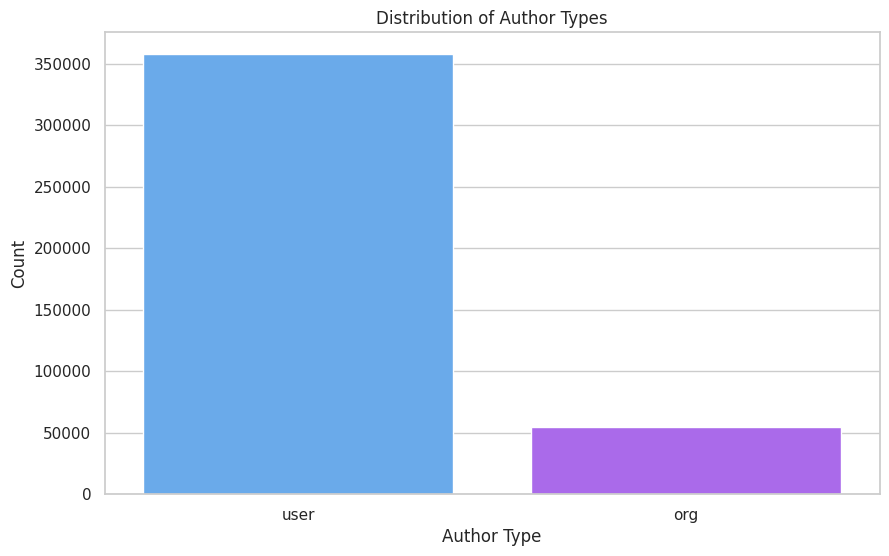

In [15]:
df['author_type'].value_counts().sort_index(ascending=False)


author_type_counts = df['author_type'].value_counts().sort_index(ascending=False)
sns.set(style="whitegrid")  


plt.figure(figsize=(10, 6)) 
sns.barplot(x=author_type_counts.index, y=author_type_counts, palette="cool")


plt.xlabel('Author Type')
plt.ylabel('Count')
plt.title('Distribution of Author Types')
plt.show()

# Replacing Null value from author_type by previous type

In [16]:
df['author_type'].fillna(method='ffill', inplace=True)
df.head(5)

,model_id,pipeline,downloads,likes,author_id,author_name,author_type,author_isPro,lastModified
0,jonatasgrosman/wav2vec2-large-xlsr-53-english,automatic-speech-recognition,72409331,316,jonatasgrosman,Jonatas Grosman,user,False,2023-03-25 10:56:55
3,openai/clip-vit-large-patch14,zero-shot-image-classification,32173869,723,openai,OpenAI,org,False,2023-09-15 15:49:35
4,timm/mobilenetv3_large_100.ra_in1k,image-classification,24075216,16,timm,PyTorch Image Models,org,False,2023-04-27 22:49:21
9,stabilityai/stable-diffusion-xl-base-1.0,text-to-image,9867946,3624,stabilityai,Stability AI,org,False,2023-10-30 16:03:47
10,sentence-transformers/all-mpnet-base-v2,sentence-similarity,9588316,487,sentence-transformers,Sentence Transformers,org,False,2023-11-02 09:35:52


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412440 entries, 0 to 412506
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   model_id      412440 non-null  object
 1   pipeline      220152 non-null  object
 2   downloads     412440 non-null  int64 
 3   likes         412440 non-null  int64 
 4   author_id     412440 non-null  object
 5   author_name   412437 non-null  object
 6   author_type   412440 non-null  object
 7   author_isPro  412440 non-null  bool  
 8   lastModified  412440 non-null  object
dtypes: bool(1), int64(2), object(6)
memory usage: 28.7+ MB


# downloads comparsion between author_type(User vs Organization)

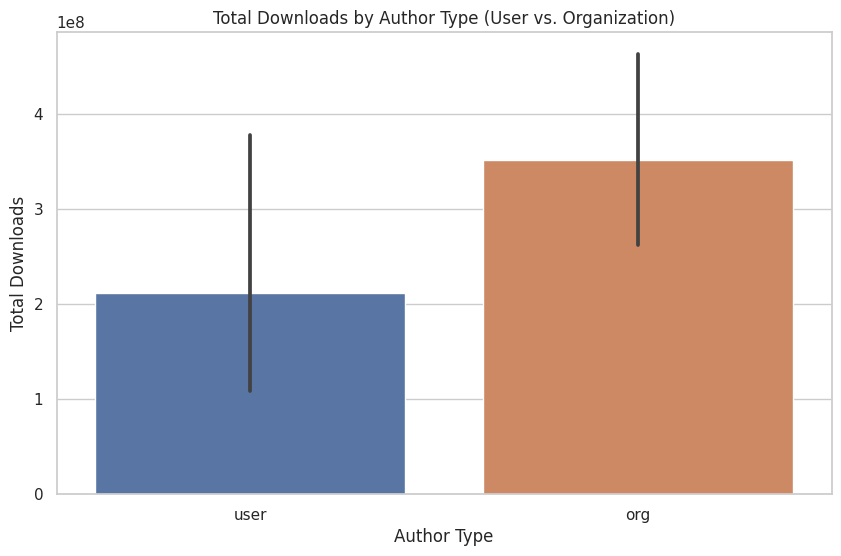

In [18]:

filtered_df = df[df['author_type'].isin(['user', 'org'])]


plt.figure(figsize=(10, 6))
sns.barplot(x='author_type', y='downloads', data=filtered_df, estimator=sum)
plt.title('Total Downloads by Author Type (User vs. Organization)')
plt.xlabel('Author Type')
plt.ylabel('Total Downloads')
plt.show()


# Likes comparsion between author_type(User vs Organization)

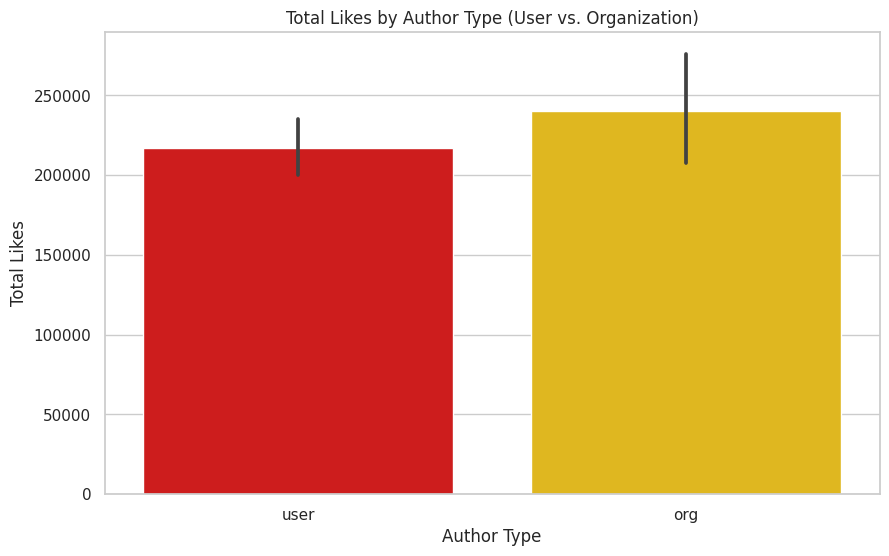

In [19]:

filtered_df = df[df['author_type'].isin(['user', 'org'])]


plt.figure(figsize=(10, 6))
sns.barplot(x='author_type', y='likes', data=filtered_df, estimator=sum,palette='hot')
plt.title('Total Likes by Author Type (User vs. Organization)')
plt.xlabel('Author Type')
plt.ylabel('Total Likes')
plt.show()

# Pro User Stats

Downloads likes statistics Pro User:
              model_id  downloads   likes
author_isPro                             
False           400949  543304462  415257
True             11491   20726990   42022


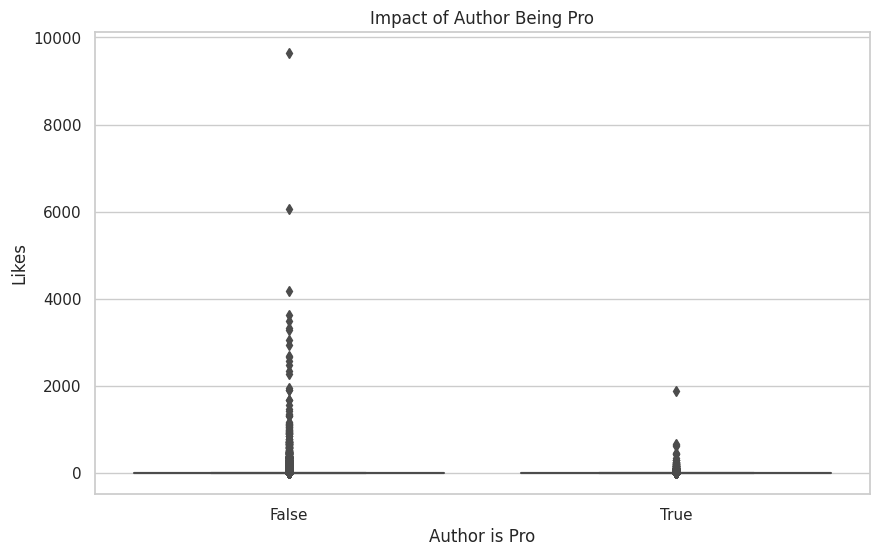

In [20]:
pro_user_stats = df.groupby('author_isPro').agg({
    'model_id': 'count',
    'downloads': 'sum',
    'likes': 'sum'
})

print("Downloads likes statistics Pro User:")
print(pro_user_stats)

plt.figure(figsize=(10, 6))
sns.boxplot(x='author_isPro', y='likes', data=df)
plt.title('Impact of Author Being Pro')
plt.xlabel('Author is Pro')
plt.ylabel('Likes')
plt.show()

# Downloads-Likes Relationship

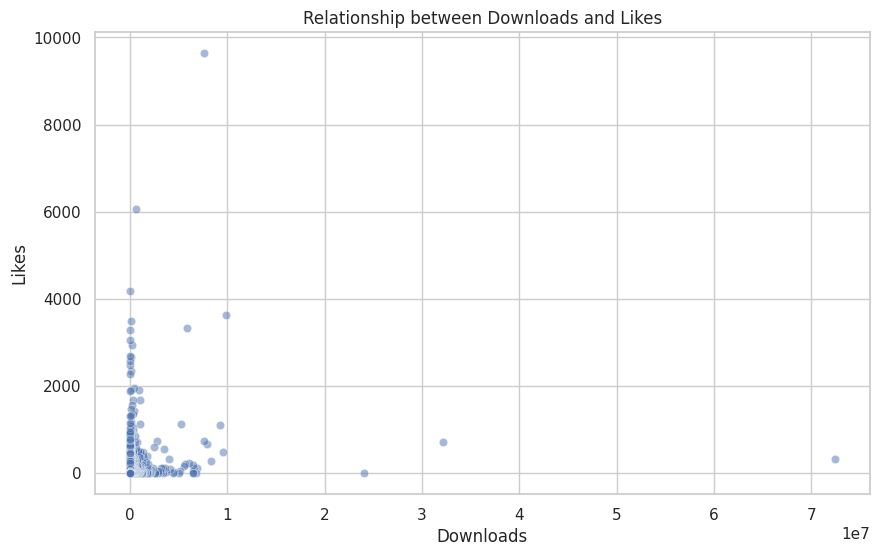

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='downloads', y='likes', data=df, alpha=0.5)
plt.title('Relationship between Downloads and Likes')
plt.xlabel('Downloads')
plt.ylabel('Likes')
plt.show()

# Top 20 Authors

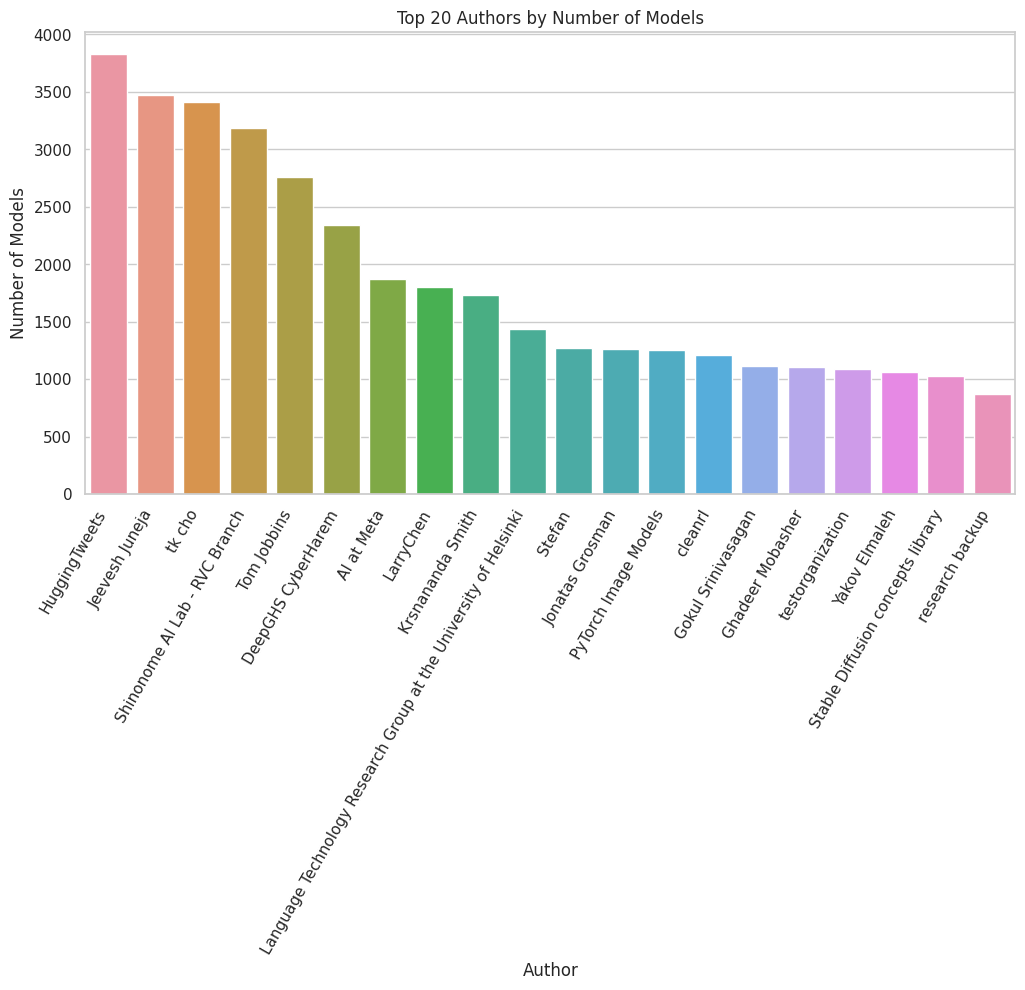

In [22]:
top_authors = df['author_name'].value_counts().nlargest(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_authors.index, y=top_authors.values)
plt.title('Top 20 Authors by Number of Models')
plt.xlabel('Author')
plt.ylabel('Number of Models')
plt.xticks(rotation=60, ha='right')
plt.show()

# top 10 authors based on likes

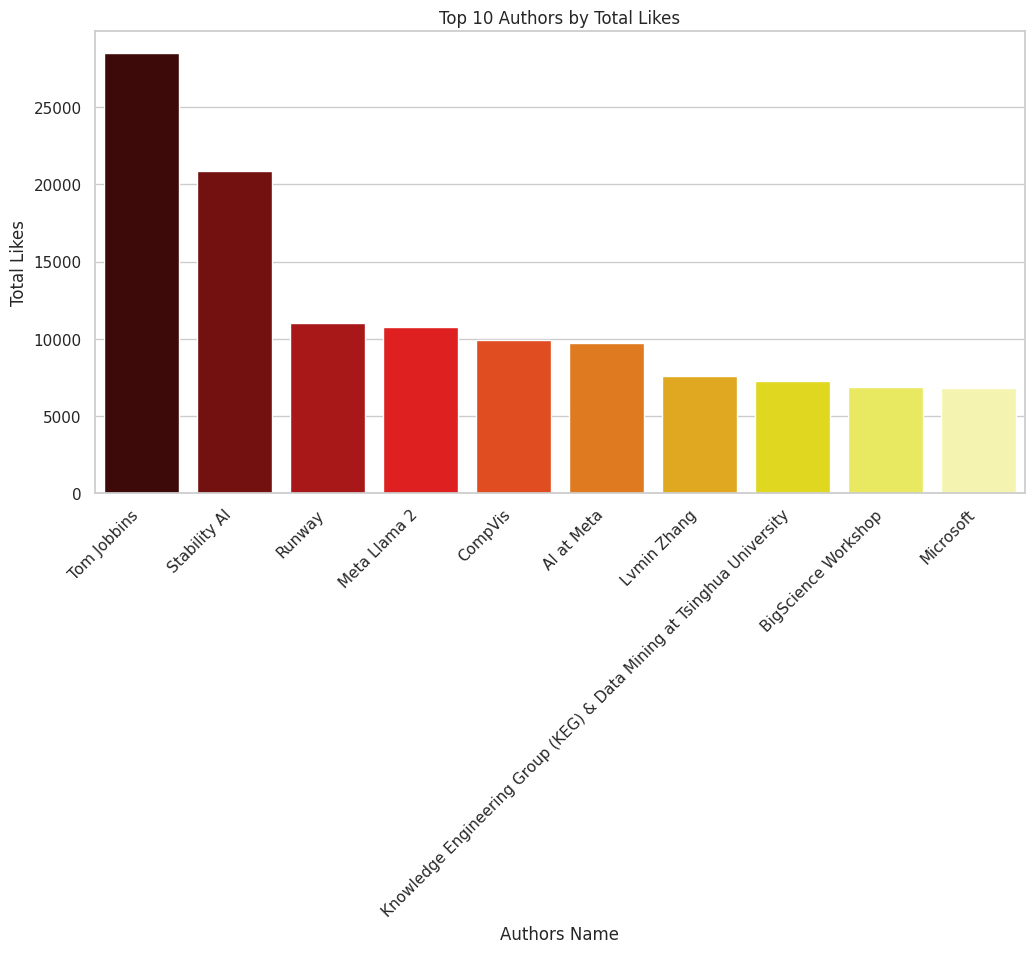

In [23]:

top_authors_likes = df.groupby('author_name')['likes'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_authors_likes.index, y=top_authors_likes.values, palette='hot')
plt.title('Top 10 Authors by Total Likes')
plt.xlabel('Authors Name')
plt.ylabel('Total Likes')
plt.xticks(rotation=45,ha='right')
plt.show()

# Top 10 authors based on downloads

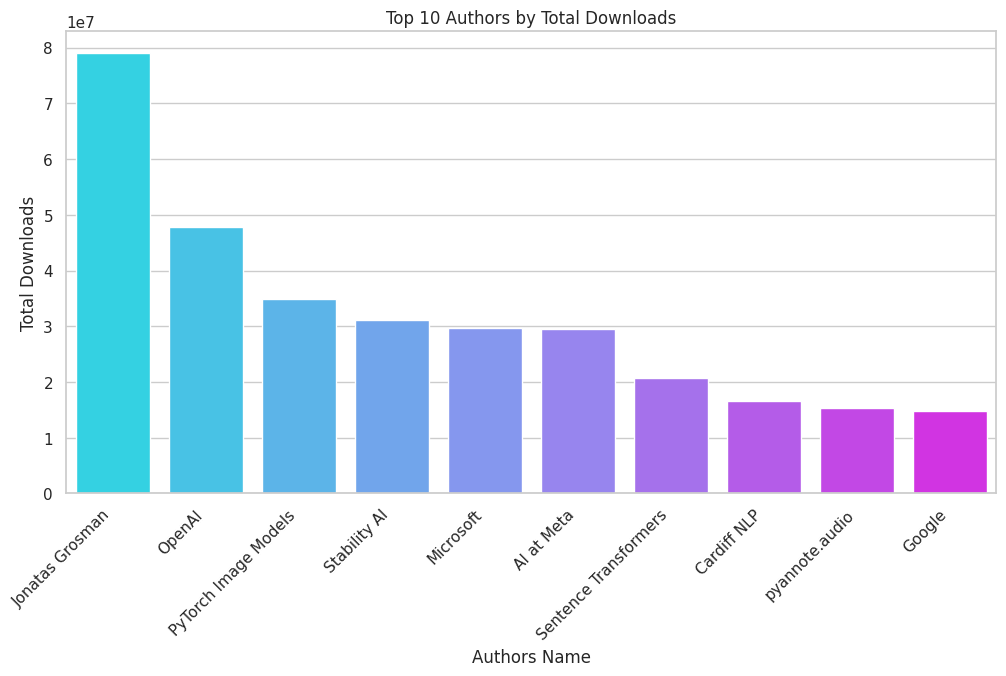

In [24]:
top_authors_downloads = df.groupby('author_name')['downloads'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_authors_downloads.index, y=top_authors_downloads.values, palette='cool')
plt.title('Top 10 Authors by Total Downloads')
plt.xlabel('Authors Name')
plt.ylabel('Total Downloads')
plt.xticks(rotation=45,ha='right')
plt.show()

# Downloads over time

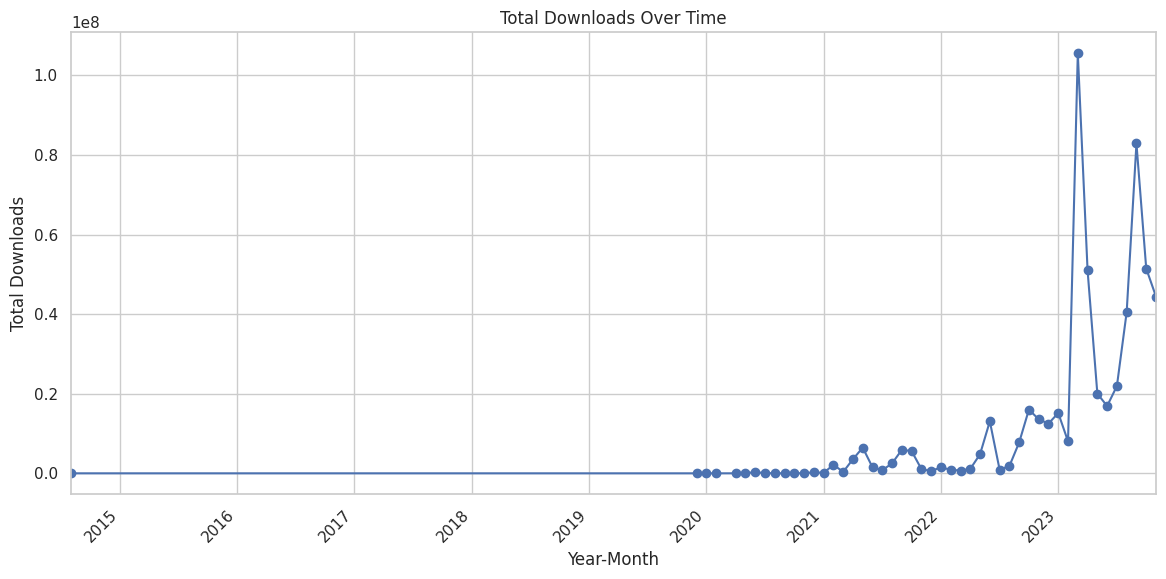

In [25]:

df['lastModified'] = pd.to_datetime(df['lastModified'])
df['year_month'] = df['lastModified'].dt.to_period('M')
downloads_over_time = df.groupby('year_month')['downloads'].sum()

plt.figure(figsize=(14, 6))
downloads_over_time.plot(marker='o', linestyle='-')
plt.title('Total Downloads Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Downloads')
plt.xticks(rotation=45, ha='right')
plt.show()

# YearWise Downloads

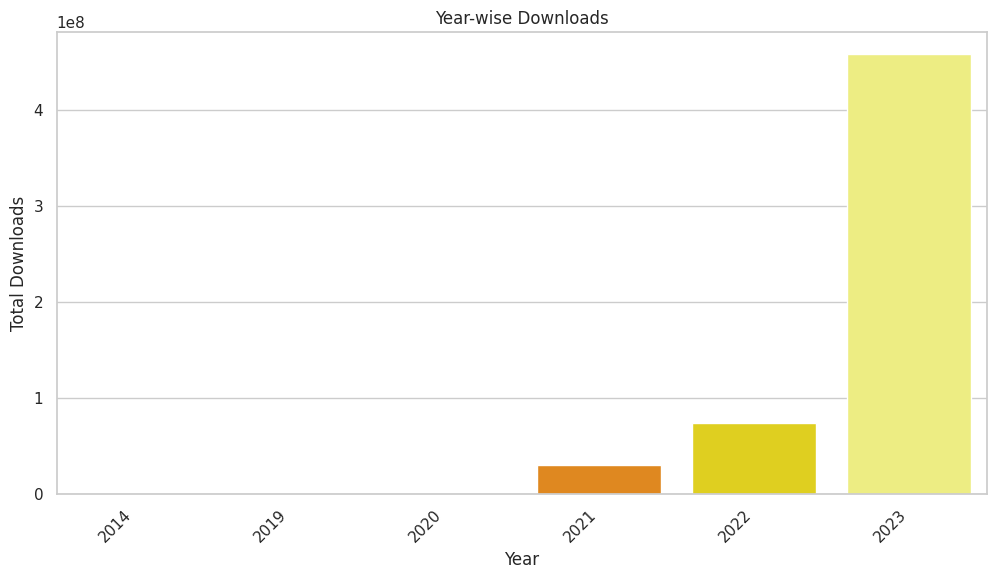

In [26]:
df['year'] = df['lastModified'].dt.year
downloads_yearwise = df.groupby('year')['downloads'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=downloads_yearwise.index, y=downloads_yearwise.values, palette='hot')
plt.title('Year-wise Downloads')
plt.xlabel('Year')
plt.ylabel('Total Downloads')
plt.xticks(rotation=45, ha='right')
plt.show()